In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from black_hole_shadows.orbits import generate_orbit, Orbit
from black_hole_shadows.utils import Metric
from black_hole_shadows.plotting import plot_orbits
from black_hole_shadows.sources import Source, Box

In [2]:
# Everything in units of r_s
D = 100
n_points = 100000

def A(r):
    return 1-1/r
def B(r):
    return 1-1/r
def dAdr(r):
    return 1/r**2
def dBdr(r):
    return 1/r**2

metric = Metric(A, B, dAdr, dBdr)

In [19]:
sphere = Source(condition=lambda x: x[0] < 5, coordinates="Spherical")
disc_face_on = Source(condition=lambda x: -0.5 < x[2] < 0.5 and 2 < x[0] < 5, coordinates="Cylindrical")

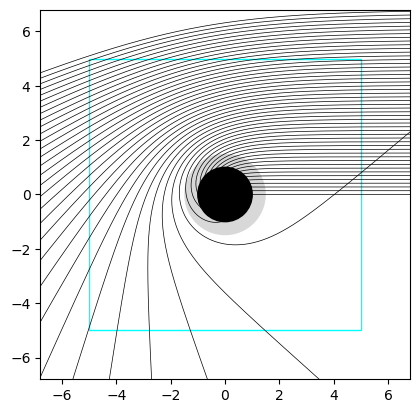

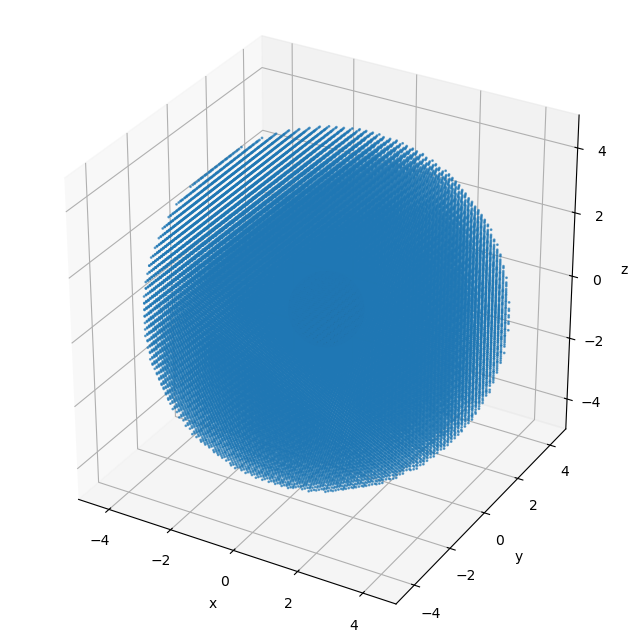

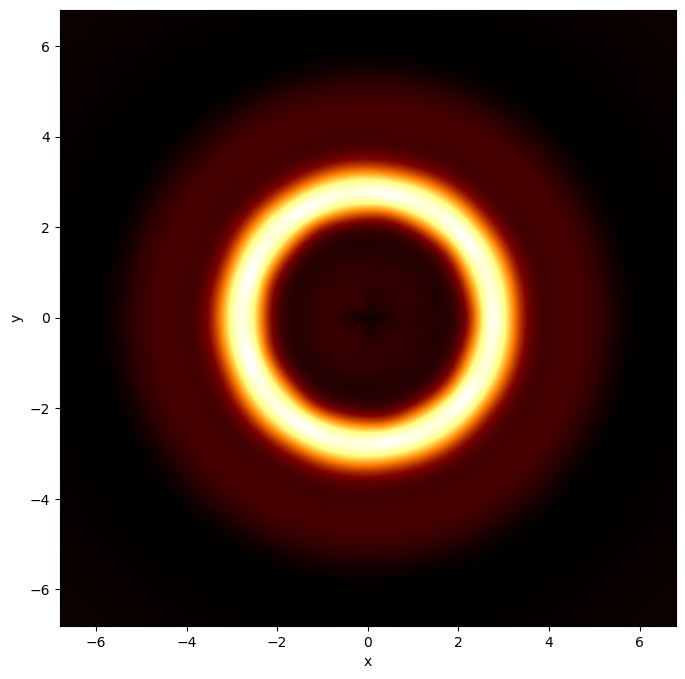

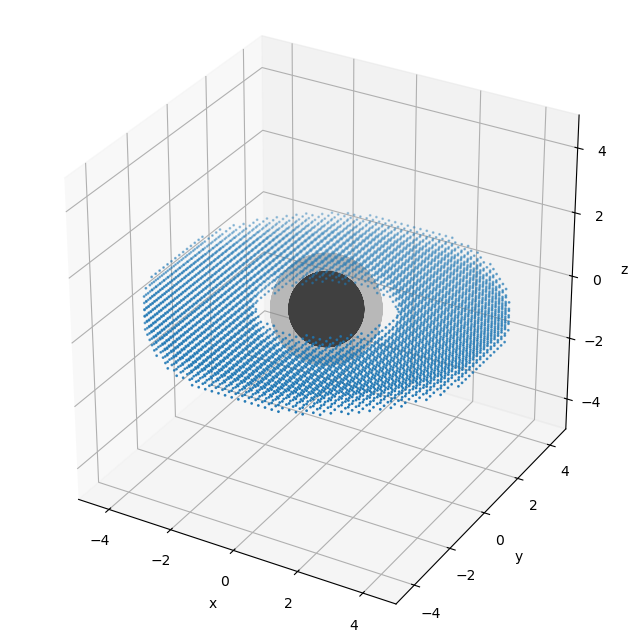

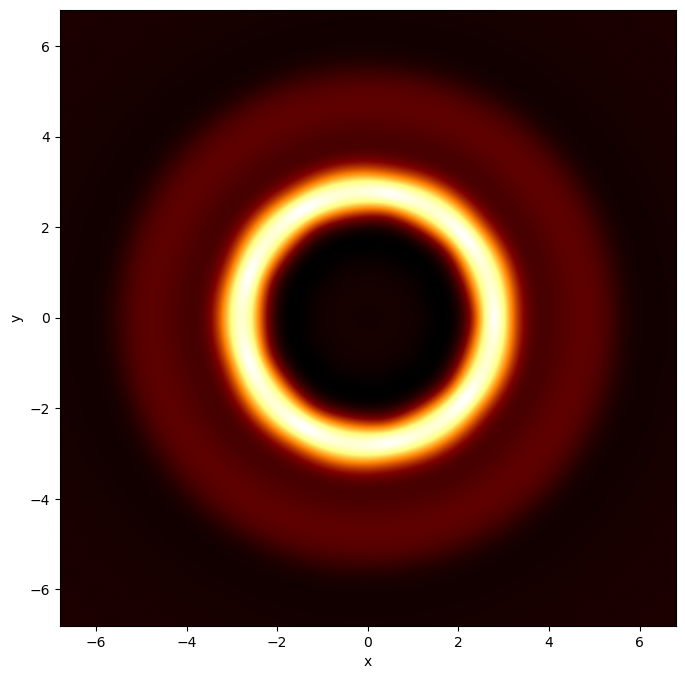

In [20]:
box = Box(box_size=10, box_points=50)
box.calculate_photon_rays(n_b=50, metric=metric, D=D, b_max=6.8, n_points=n_points)
box.plot_box_orbits()
box.add_source(sphere)
box.plot_source()
box.calculate_pixel_brightness(n_alpha=10)
box.plot_image(smoothing=1)

box.clear_sources()
box.add_source(disc_face_on)
box.plot_source()
box.calculate_pixel_brightness(n_alpha=10)
box.plot_image(smoothing=1)

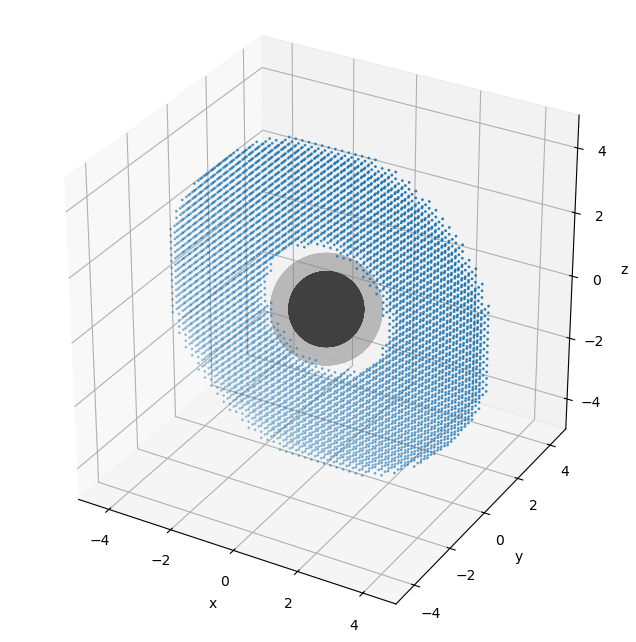

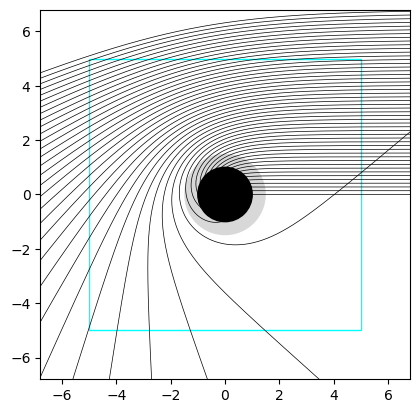

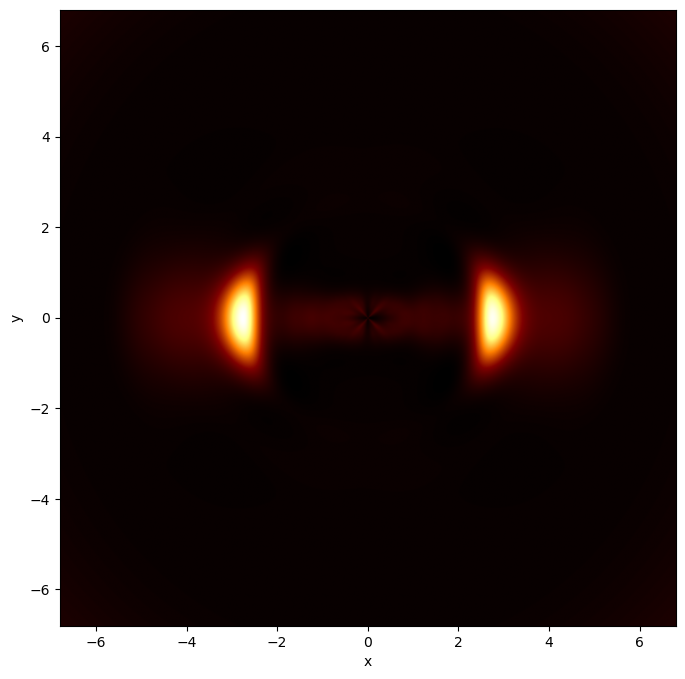

In [18]:
# Now try an accretion disc with a tilted viewing angle
box = Box(box_size=10, box_points=50, viewing_angles=(np.pi/2,0)) # An edge on disc
box.add_source(disc_face_on)
box.plot_source()
box.calculate_photon_rays(n_b=50, metric=metric, D=D, b_max=6.8, n_points=n_points)
box.plot_box_orbits()
box.calculate_pixel_brightness(n_alpha=50)
box.plot_image(smoothing=1)


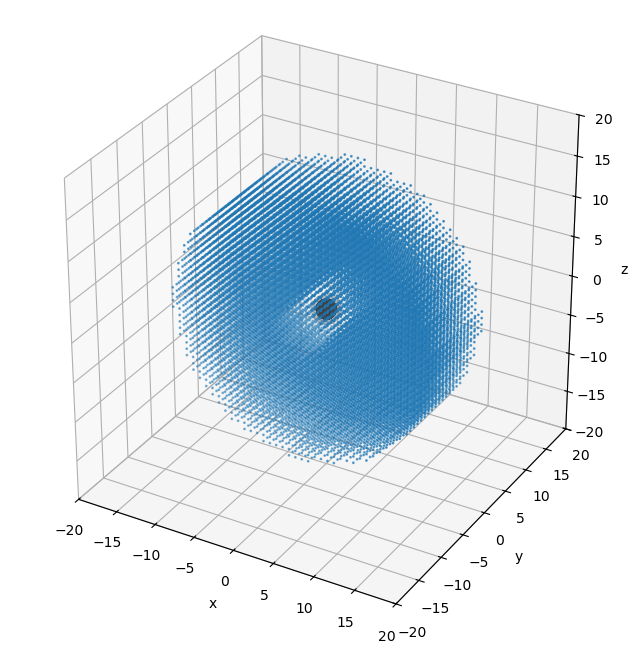

In [6]:
# Now trying a very thick disc with large inner radius edge on
box = Box(box_size=40, box_points=50, viewing_angles=(np.pi/2,0)) # An edge on disc
disc = Source(condition=lambda x: -13/2 < x[2] < 13/2 and 3 < x[0] < 16, coordinates="Cylindrical")
box.add_source(disc)
box.plot_source()

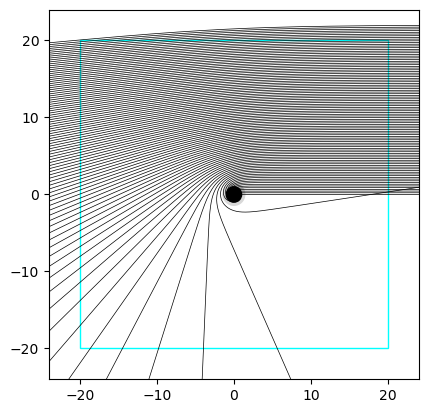

In [14]:
box.calculate_photon_rays(n_b=100, metric=metric, D=D, b_max=22, n_points=n_points)
box.plot_box_orbits()

In [15]:
box.calculate_pixel_brightness(n_alpha=50)

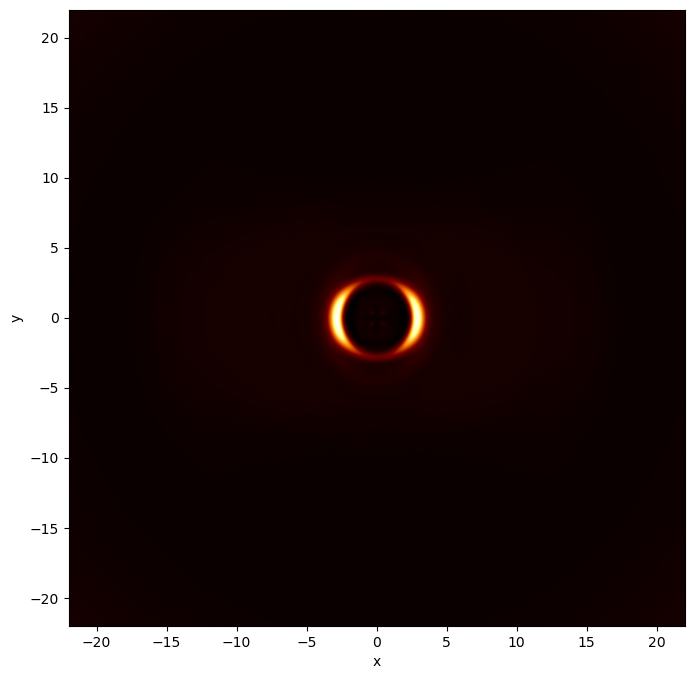

In [17]:
box.plot_image(smoothing=1)

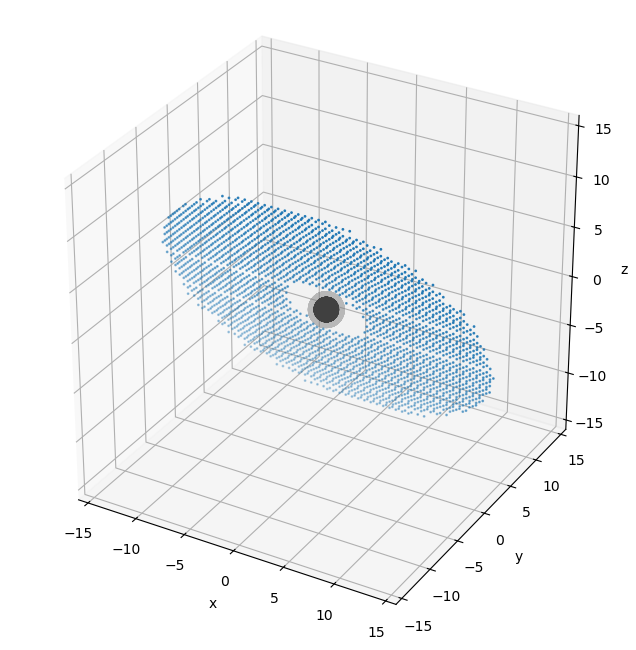

In [22]:
# What about a thin disc at a 60 degree angle
box = Box(box_size=32, box_points=50, viewing_angles=(-np.pi/3,0)) # An edge on disc
disc = Source(condition=lambda x: -0.5 < x[2] < 0.5 and 4 < x[0] < 16, coordinates="Cylindrical")
box.add_source(disc)
box.plot_source()

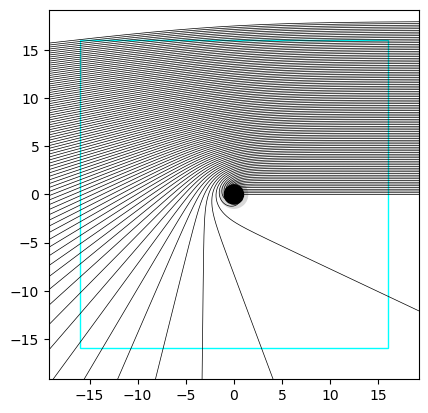

In [28]:
box.calculate_photon_rays(n_b=100, metric=metric, D=D, b_max=18, n_points=n_points)
box.plot_box_orbits()

In [29]:
box.calculate_pixel_brightness(n_alpha=50)

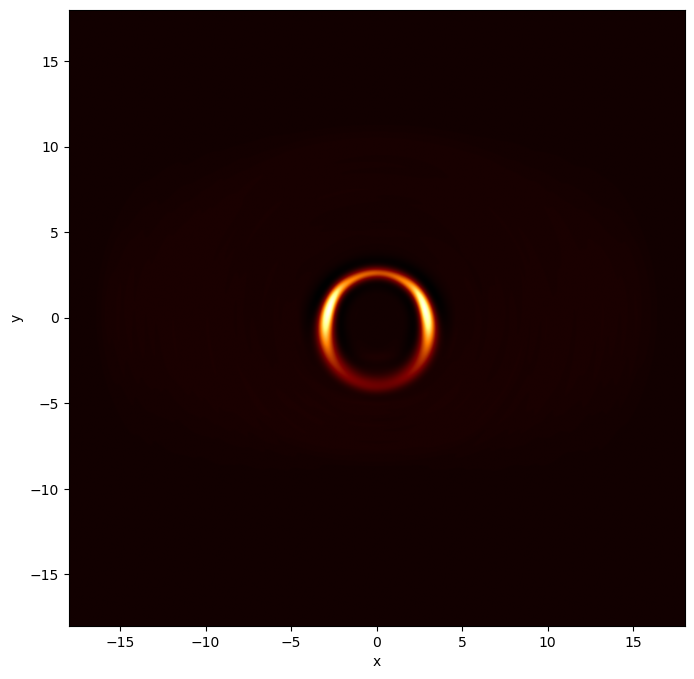

In [31]:
box.plot_image(smoothing=1)